In [17]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data_with_sent
from utils import comp_metrics,describe_model_architecture
import numpy as np
import json

In [13]:
version = 'v4'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [14]:
# Daten laden
td, vd = load_data_with_sent(data_path, window_size=30)

In [15]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [18]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "cnn_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_0",
    "type": "Conv1D"
  },
  {
    "name": "dropout_5",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "lstm_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_1",
    "type": "Conv1D"
  },
  {
    "name": "lstm_1",
    "type": "LSTM",
    "units": 80
  },
  {
    "name": "dropout_6",
    "type": "Dropout",
    "dropout_rate": 0.4
  },
  {
    "name": "dropout_4",
    "type": "Dropout",
    "dropout_rate": 0.30000000000000004
  },
  {
    "name": "flatten_1",
    "type": "Flatten"
  },
  {
    "name": "concatenate_1",
    "type": "Concatenate"
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 64
  },
  {
    "name": "dense_4",
    "type": "Dense",
    "units": 32
  },
  {
    "name": "dense_5",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.3945438861846924
Mean Squared Error (MSE): 3.508998155593872
Accuracy: 98.63%


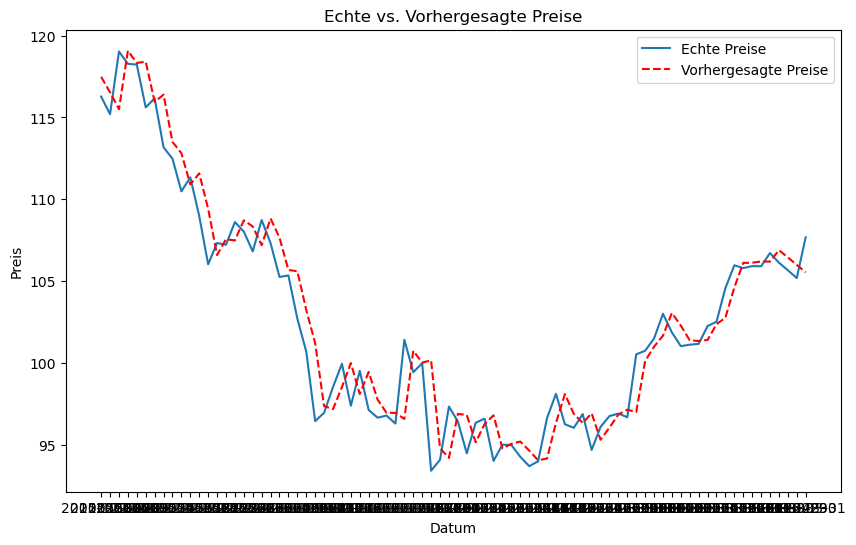

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 10.369174003601074
Mean Squared Error (MSE): 227.01553344726562
Accuracy: 98.23%


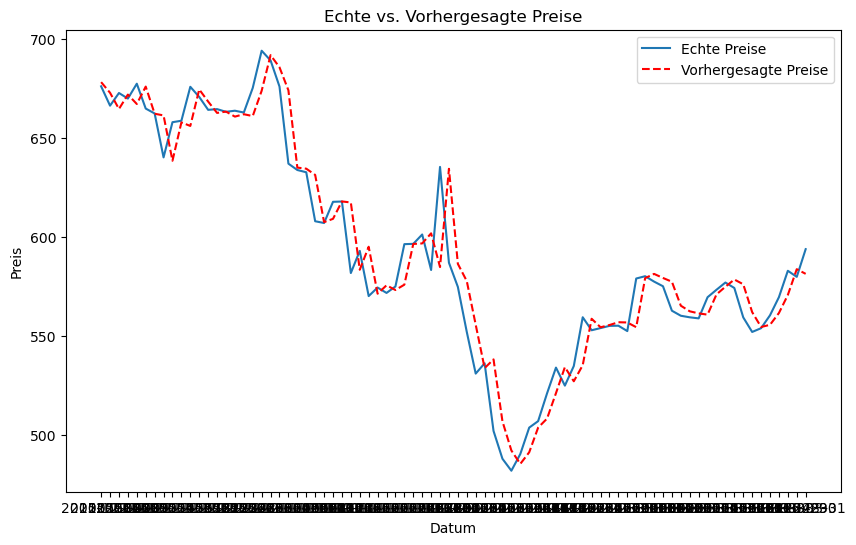

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.35816189646720886
Mean Squared Error (MSE): 0.22801823914051056
Accuracy: 98.59%


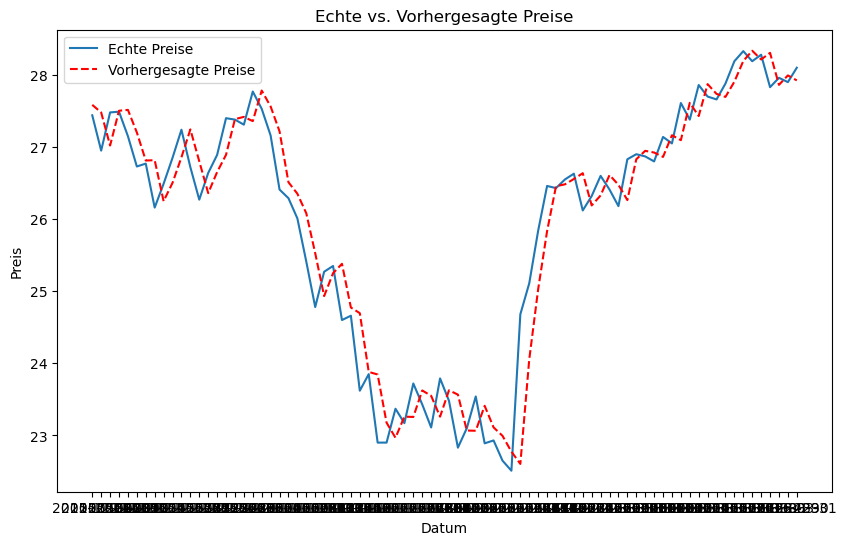

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.6510601043701172
Mean Squared Error (MSE): 6.274170875549316
Accuracy: 98.42%


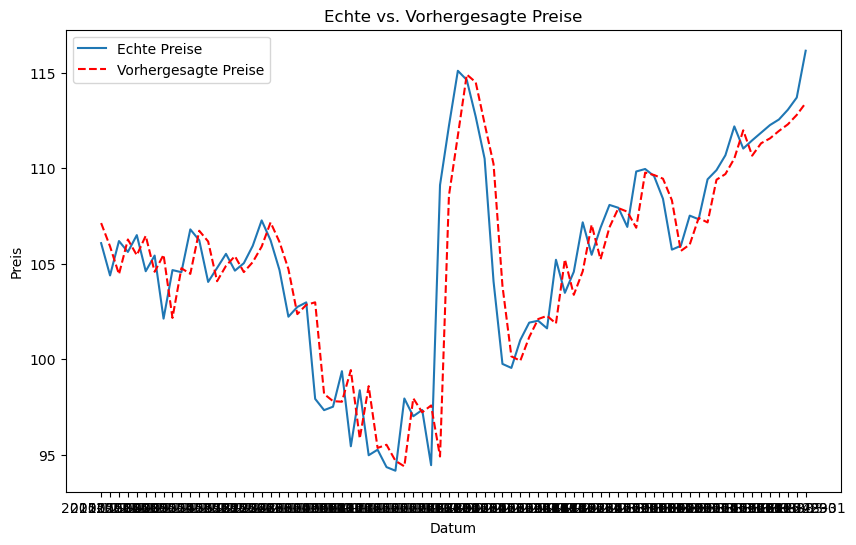

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 8.655527114868164
Mean Squared Error (MSE): 129.26467895507812
Accuracy: 98.80%


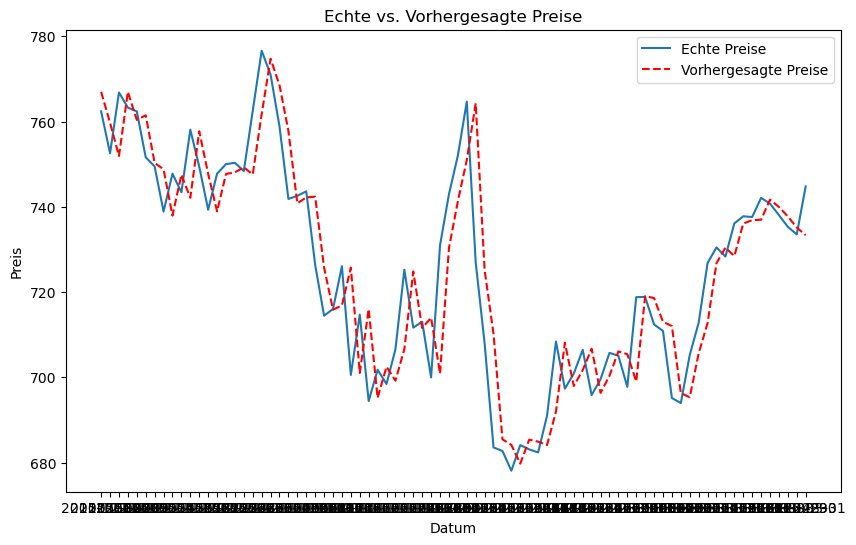

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.41196155548095703
Mean Squared Error (MSE): 0.3332902789115906
Accuracy: 98.69%


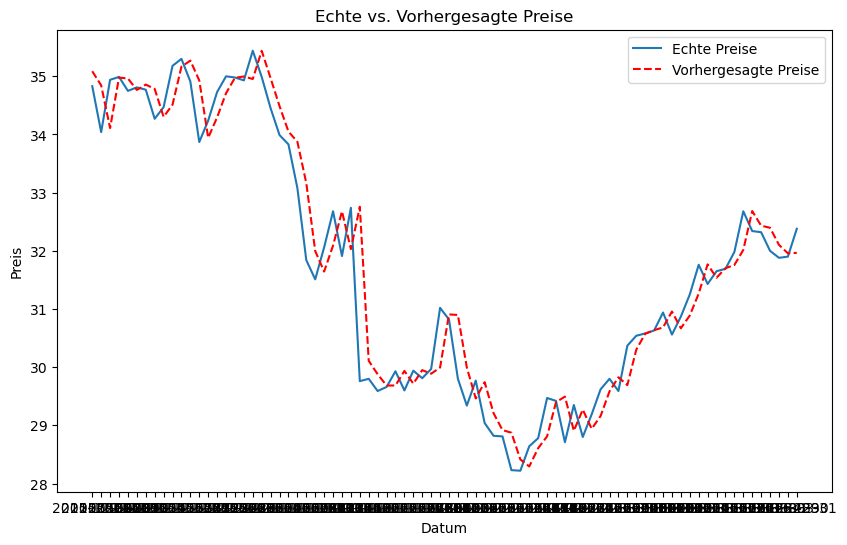

Predicting KO...
Metrics for KO
Mean Absolute Error (MAE): 0.30509400367736816
Mean Squared Error (MSE): 0.15448491275310516
Accuracy: 99.29%


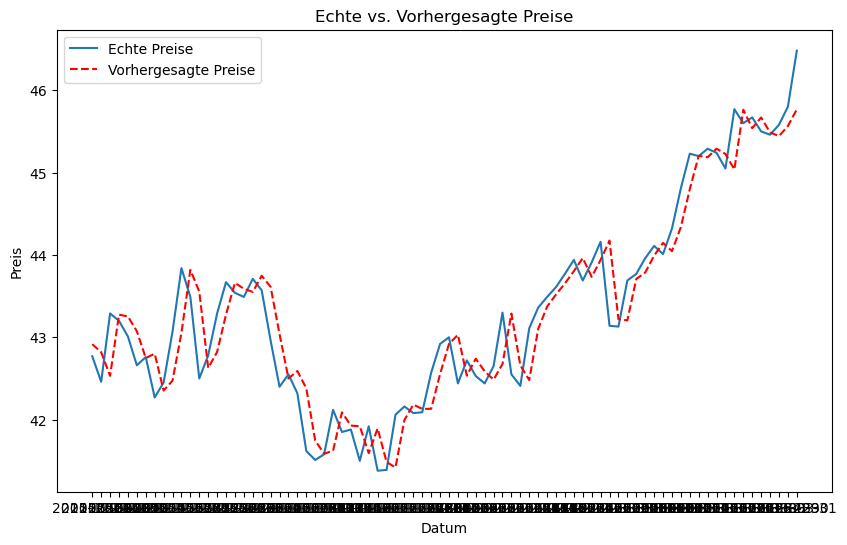

Predicting MA...
Metrics for MA
Mean Absolute Error (MAE): 1.2019582986831665
Mean Squared Error (MSE): 2.436854600906372
Accuracy: 98.66%


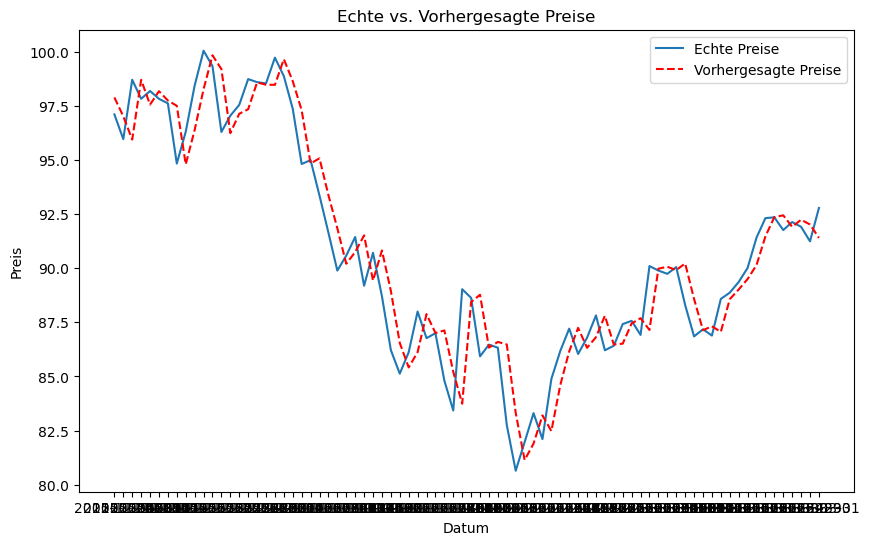

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7162074446678162
Mean Squared Error (MSE): 0.828981876373291
Accuracy: 98.65%


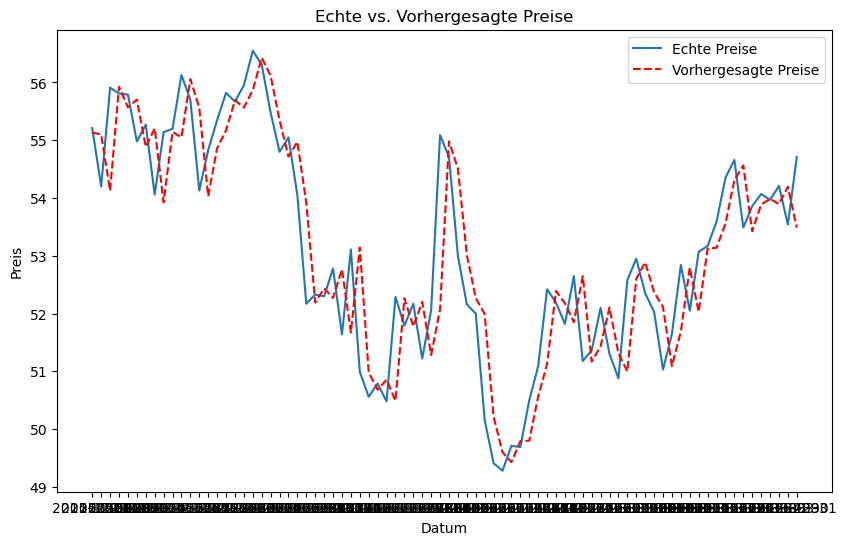

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.4565669894218445
Mean Squared Error (MSE): 0.3491235673427582
Accuracy: 98.77%


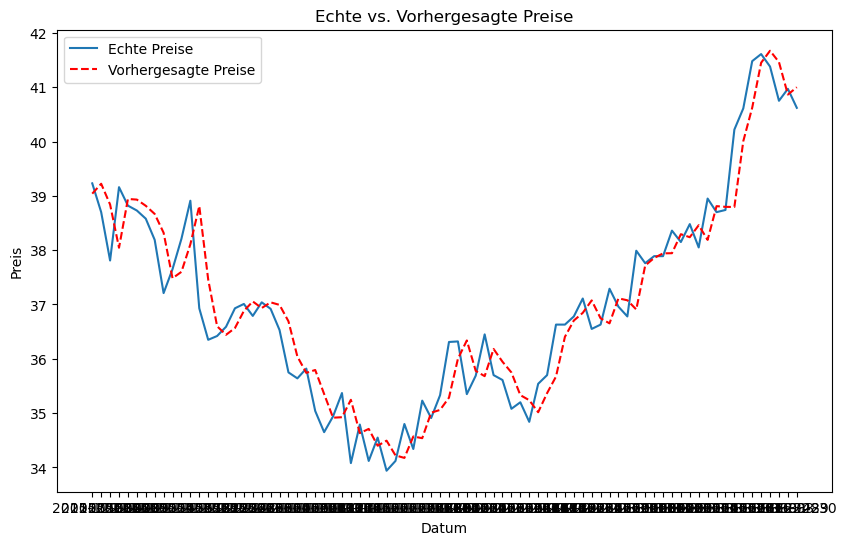

In [16]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    X_nums = X[:,:, :1]
    X_sent = X[:,:, 1:]
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict([X_nums, X_sent])
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)